# Stock Clustering Analysis Pipeline

This notebook performs a complete clustering analysis pipeline on stock returns data using multiple clustering methods:
- **Leiden Clustering**: Community detection based on correlation matrix
- **Louvain Clustering**: Modularity-based community detection
- **Industry Clustering**: Clustering based on industry classification

The analysis visualizes how different industries are distributed across clusters identified by each method.

## Step 2: Run All Clustering Methods

Apply Leiden, Louvain, and Industry-based clustering to the returns data.

In [ ]:
from Utils import run_all_clustering_methods

# Run all clustering methods
print("Running clustering methods...")
clustering_results = run_all_clustering_methods(Returns)

print("\nClustering completed successfully!")
print(f"\nClustering Results Shape: {clustering_results.shape}")
print("\nFirst few results:")
print(clustering_results.head(10))

# Summary statistics
print("\n" + "="*60)
print("CLUSTERING SUMMARY")
print("="*60)

for method in ['Leiden_Cluster', 'Louvain_Cluster', 'Industry_Cluster']:
    n_clusters = clustering_results[method].nunique()
    print(f"\n{method}:")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Cluster sizes:")
    cluster_sizes = clustering_results[method].value_counts().sort_index()
    for cluster_id, size in cluster_sizes.items():
        print(f"    Cluster {cluster_id}: {size} stocks")

Running clustering methods...
Original shape of Returns data: (33978, 84)
Original shape of Returns data: (33978, 84)

Clustering completed successfully!

Clustering Results Shape: (84, 3)

First few results:
     Louvain_Cluster  Leiden_Cluster  Industry_Cluster
ABT                0               2                 5
AEP                1               0                13
ALL                2               1                 7
APA                2               1                 2
AVP                1               0                 7
AXP                1               0                 3
BA                 2               1                 6
BAC                0               2                 3
BAX                1               0                 5
BHI                0               2                 2

CLUSTERING SUMMARY

Leiden_Cluster:
  Number of clusters: 3
  Cluster sizes:
    Cluster 0: 31 stocks
    Cluster 1: 29 stocks
    Cluster 2: 24 stocks

Louvain_Cluster:
  Number of clu

## Step 3: Visualize Industry Distribution Across Clusters

Create stacked bar charts showing the proportion of each industry within each cluster for all three clustering methods.

Creating visualization...


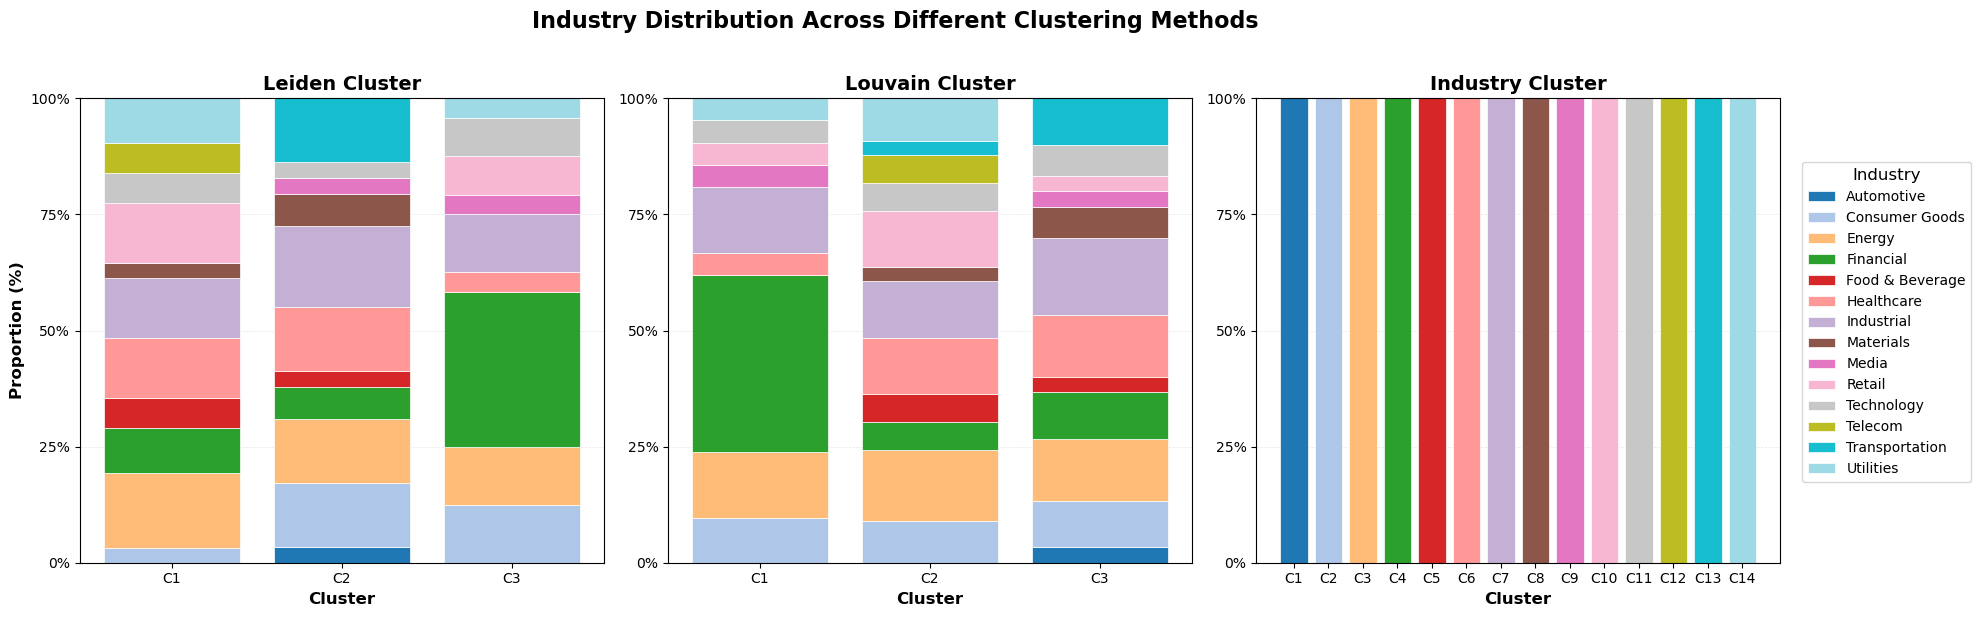


Visualization complete!


In [ ]:
from plots import plot_all_clustering_methods, plot_industry_distribution_by_cluster

# Plot all three clustering methods side by side
print("Creating visualization...")
fig = plot_all_clustering_methods(clustering_results)
plt.show()

print("\nVisualization complete!")

## Step 4: Cluster Correlation Analysis

Visualize the correlation strength within and between clusters. The network graphs show:
- **Nodes**: Represent clusters (size proportional to number of stocks)
- **Edges**: Represent average correlation strength between clusters
- **Edge Labels**: Show the average correlation percentage
- **Node Labels**: Show cluster ID

Creating cluster correlation graphs...


/Users/timot/Desktop/Project Big DATA/plots.py:332: RuntimeWarning: Mean of empty slice
  avg_within = np.nanmean(np.abs(within_corr))


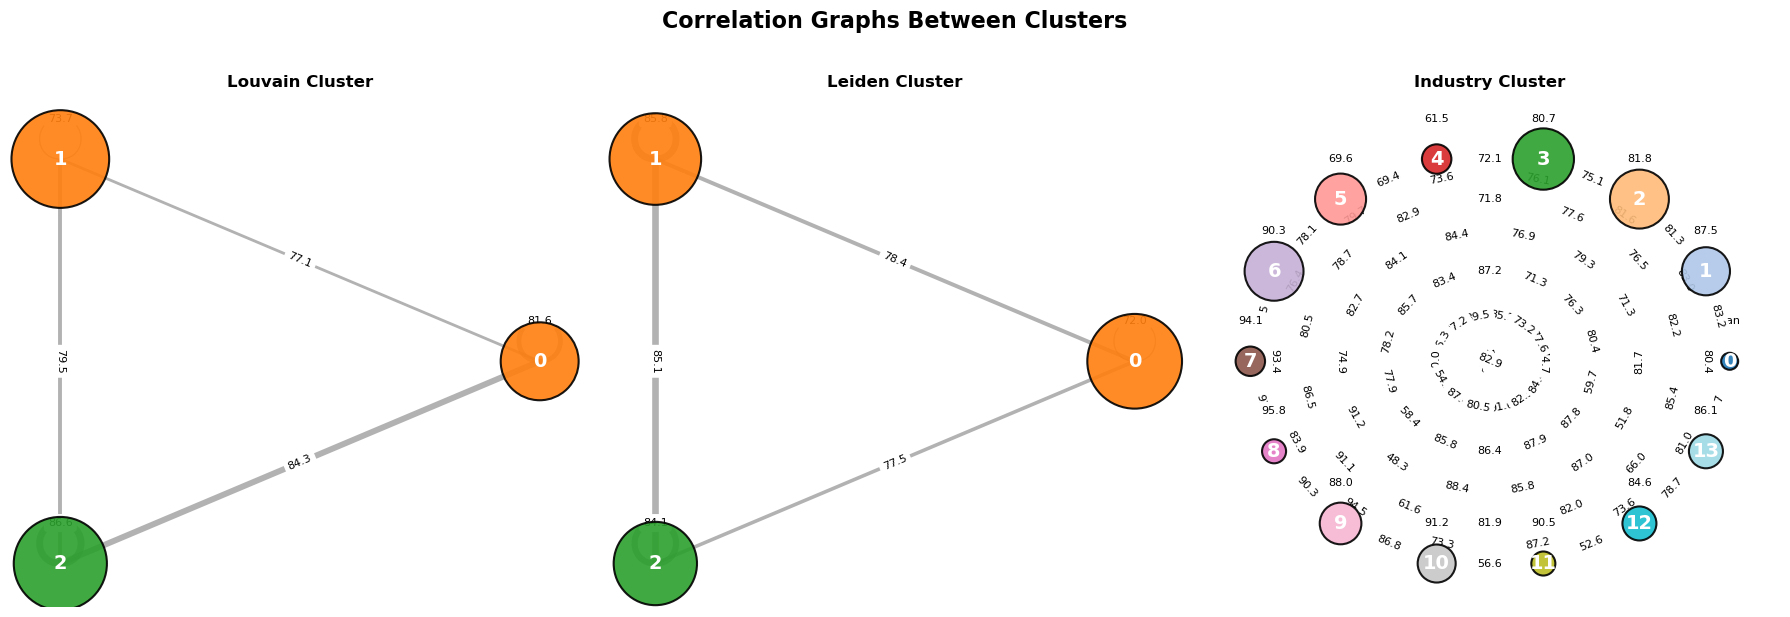


Correlation graphs complete!


In [ ]:
from plots import plot_all_cluster_correlation_graphs

# Plot correlation graphs for all clustering methods
print("Creating cluster correlation graphs...")
fig_corr = plot_all_cluster_correlation_graphs(Returns, clustering_results)
plt.show()

print("\nCorrelation graphs complete!")

### Individual Cluster Correlation Graphs

Create detailed correlation graphs for each clustering method individually.

Louvain Cluster Correlation Analysis:


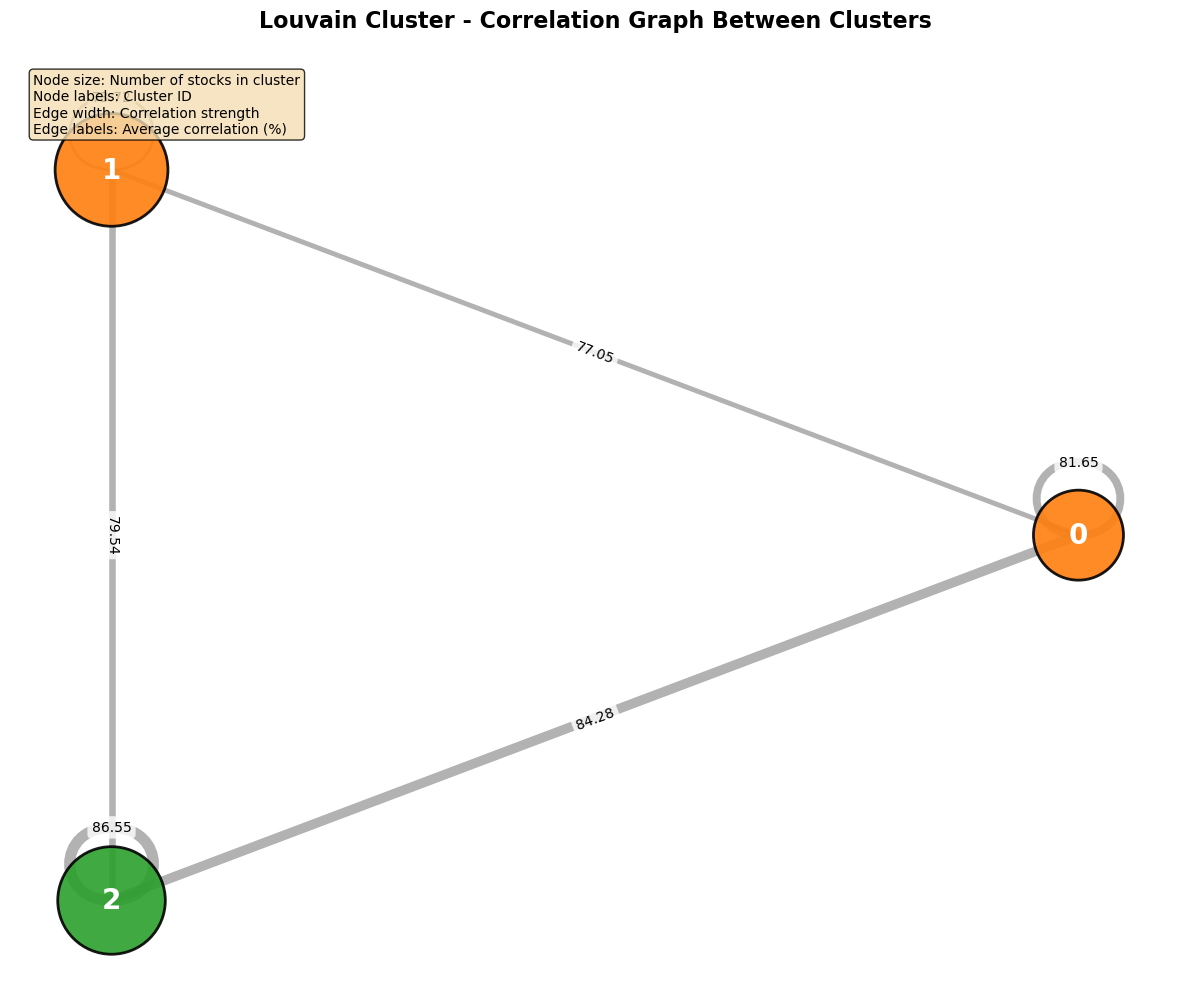

In [ ]:
from plots import plot_cluster_correlation_graph

# Louvain Cluster Correlation Graph
print("Louvain Cluster Correlation Analysis:")
fig_louvain_corr, ax_louvain_corr = plot_cluster_correlation_graph(
    Returns, clustering_results, cluster_column='Louvain_Cluster'
)
plt.show()

Leiden Cluster Correlation Analysis:


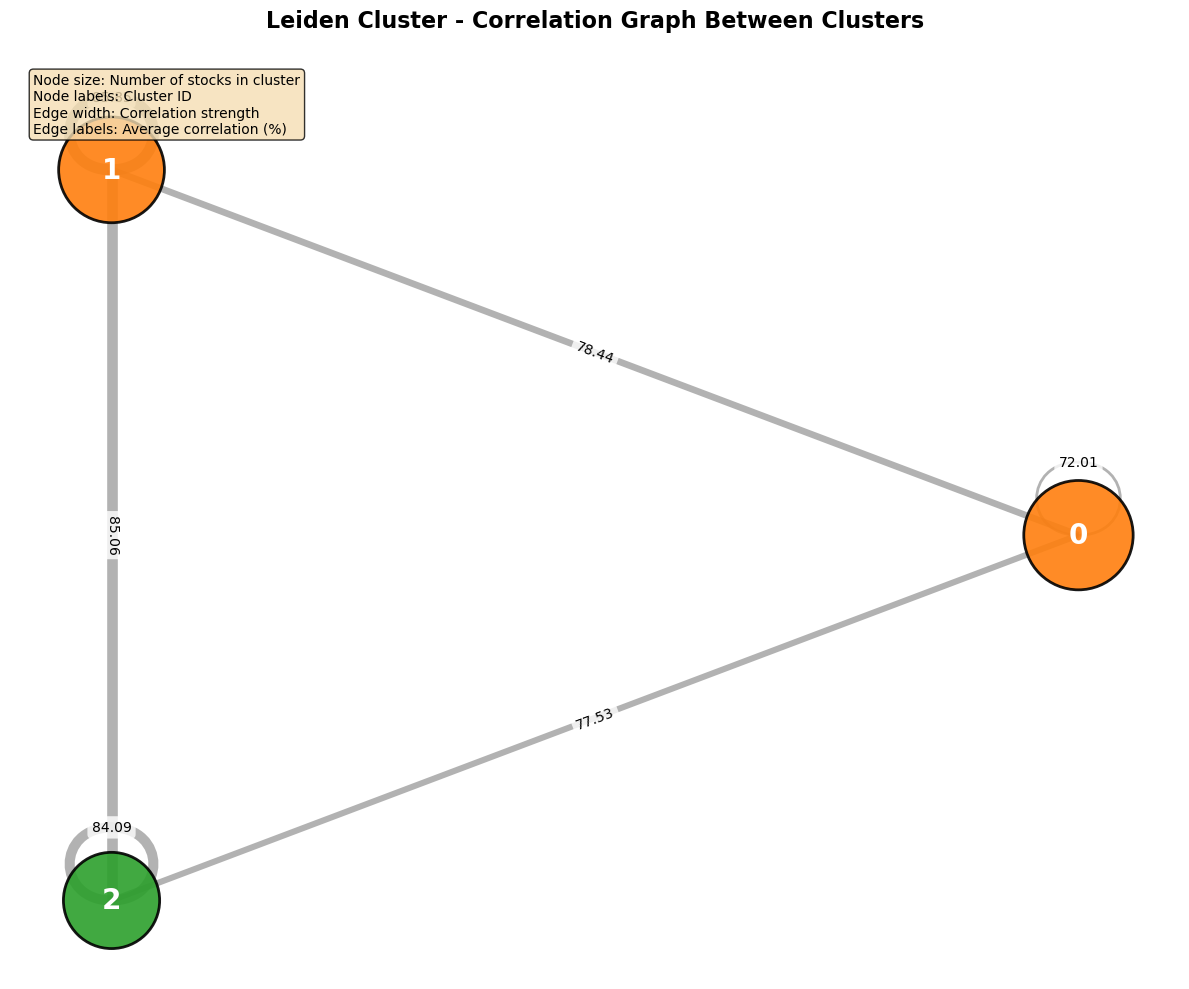

In [ ]:
# Leiden Cluster Correlation Graph
print("Leiden Cluster Correlation Analysis:")
fig_leiden_corr, ax_leiden_corr = plot_cluster_correlation_graph(
    Returns, clustering_results, cluster_column='Leiden_Cluster'
)
plt.show()

Industry-Based Cluster Correlation Analysis:


/Users/timot/Desktop/Project Big DATA/plots.py:205: RuntimeWarning: Mean of empty slice
  avg_within = np.nanmean(np.abs(within_corr))


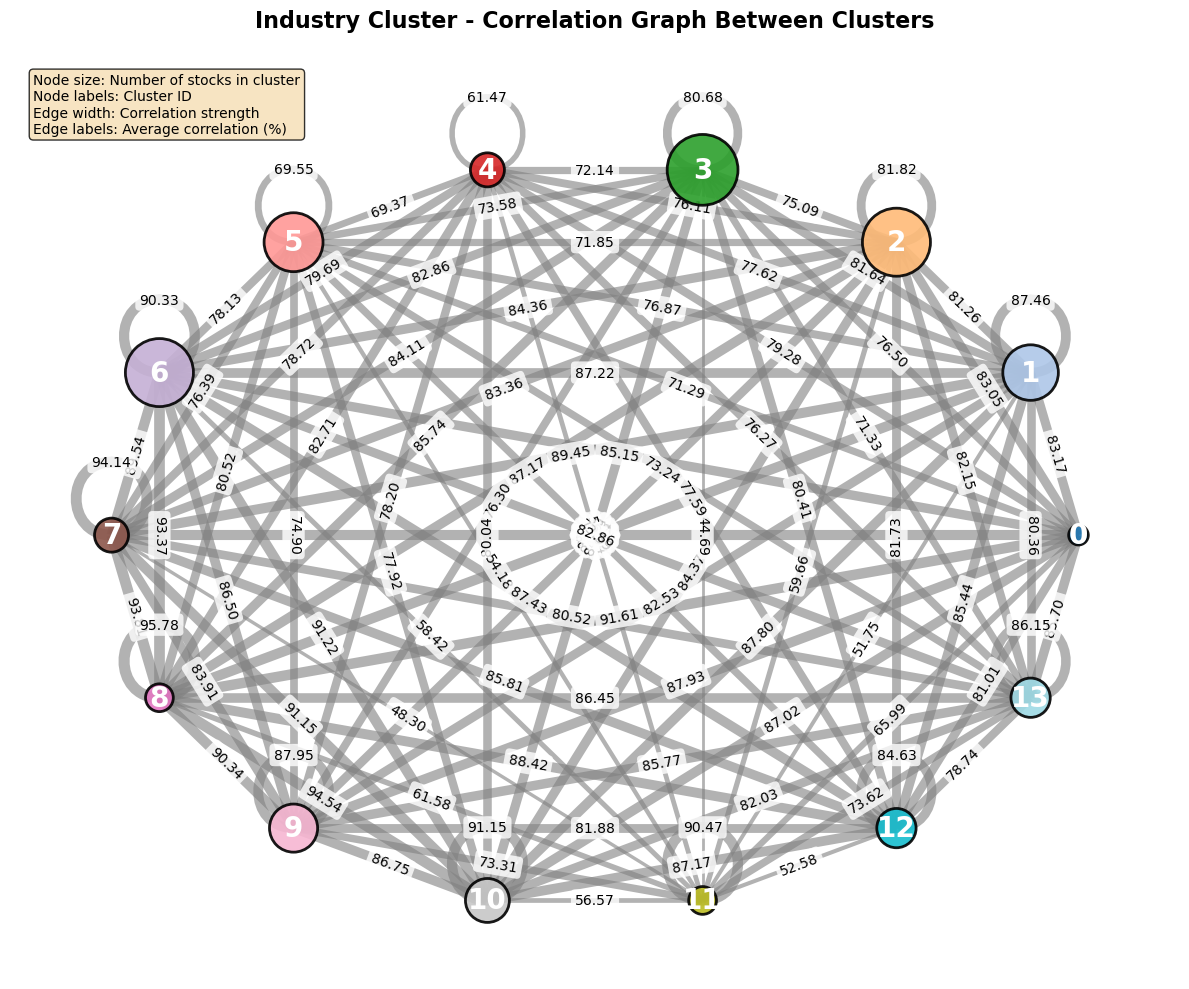

In [ ]:
# Industry Cluster Correlation Graph
print("Industry-Based Cluster Correlation Analysis:")
fig_industry_corr, ax_industry_corr = plot_cluster_correlation_graph(
    Returns, clustering_results, cluster_column='Industry_Cluster'
)
plt.show()

## Step 5: Individual Industry Distribution Analysis 

Create detailed plots for each clustering method individually.

Leiden Clustering Analysis:


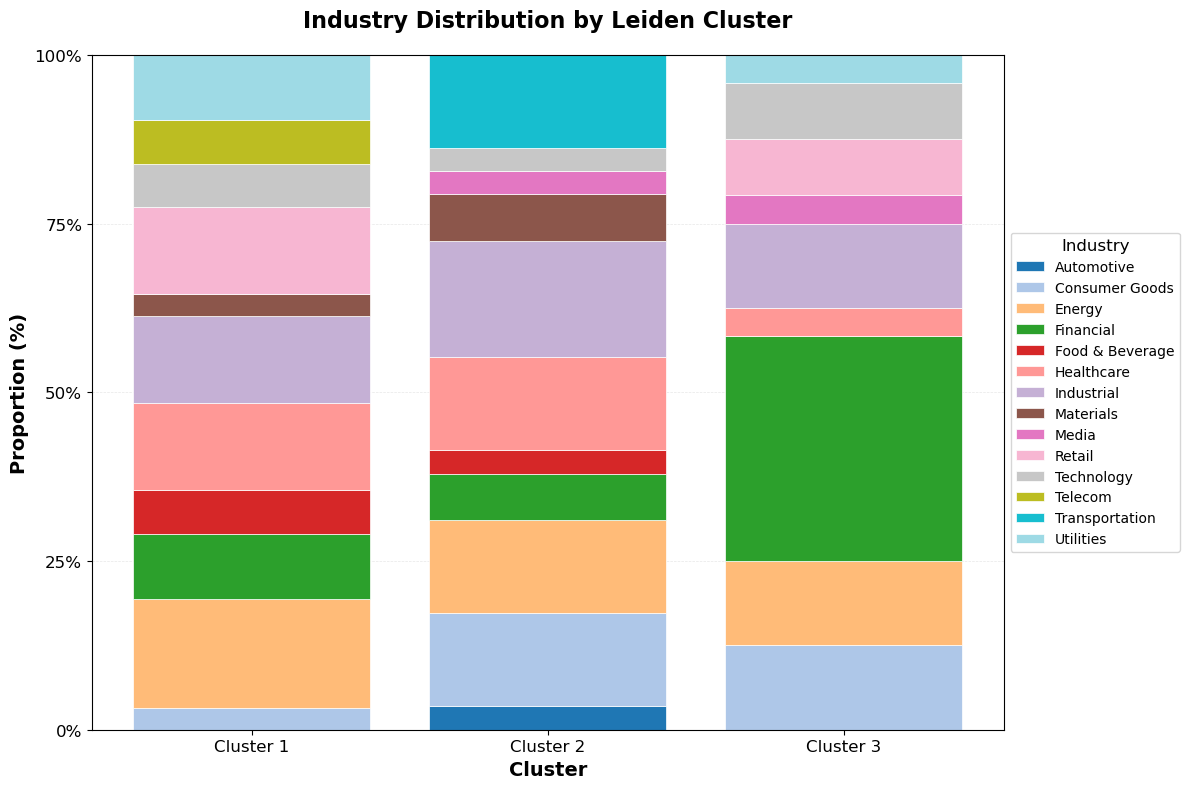

In [ ]:
# Plot Leiden clustering
print("Leiden Clustering Analysis:")
fig_leiden, ax_leiden = plot_industry_distribution_by_cluster(clustering_results, cluster_column='Leiden_Cluster')
plt.show()

Louvain Clustering Analysis:


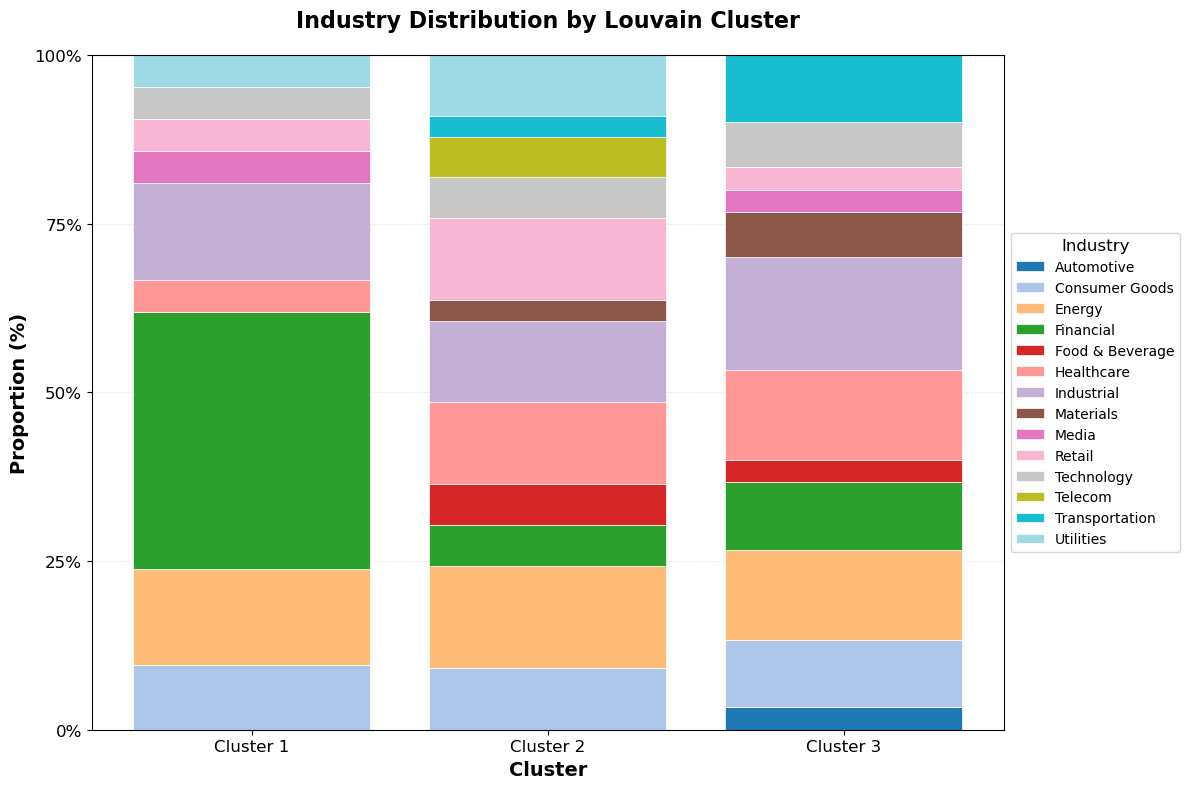

In [ ]:
# Plot Louvain clustering
print("Louvain Clustering Analysis:")
fig_louvain, ax_louvain = plot_industry_distribution_by_cluster(clustering_results, cluster_column='Louvain_Cluster')
plt.show()

Industry-Based Clustering Analysis:


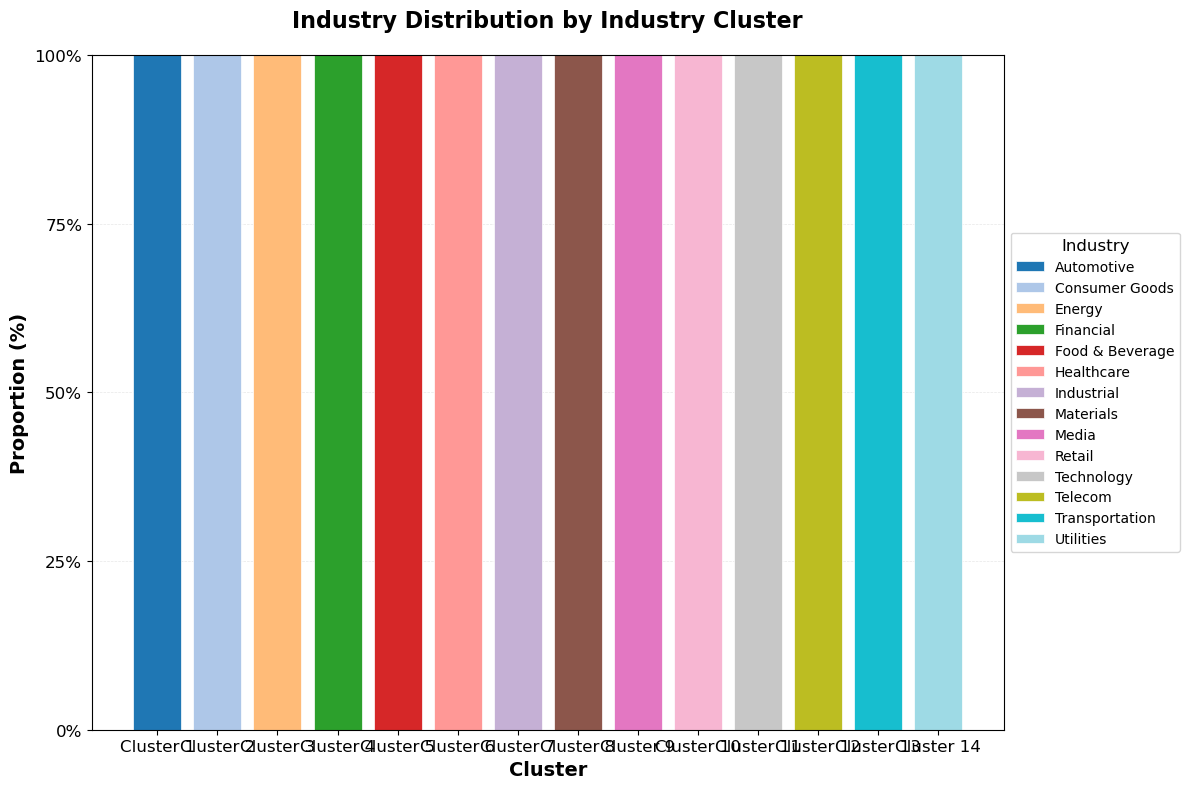

In [ ]:
# Plot Industry clustering
print("Industry-Based Clustering Analysis:")
fig_industry, ax_industry = plot_industry_distribution_by_cluster(clustering_results, cluster_column='Industry_Cluster')
plt.show()

## Step 6: Export Results 

Save the clustering results to a CSV file for further analysis.

In [ ]:
# Export clustering results
output_filename = 'clustering_results.csv'
clustering_results.to_csv(output_filename)
print(f"Clustering results saved to: {output_filename}")

# Display final results
print("\nFinal Clustering Results:")
clustering_results

Clustering results saved to: clustering_results.csv

Final Clustering Results:


,Louvain_Cluster,Leiden_Cluster,Industry_Cluster
ABT,0,2,5
AEP,1,0,13
ALL,2,1,7
APA,2,1,2
AVP,1,0,7
...,...,...,...
WMB,2,1,2
WMT,1,0,9
WY,2,1,7
XOM,1,0,2


ENTERING PHASE 3: CLUSTERING PIPELINE

3.1 Loading stock returns...
  Loading + structuring 'stock_returns.csv'...
  Input data shape: (33546, 78)
  Number of stocks: 78
  Number of time periods: 33546
3.2 Running clustering methods
  Each method uses its own built-in correlation matrix cleaning.

  1. Running Leiden Clustering...
   Leiden: 4 clusters identified

  2. Running Louvain Clustering...
   Louvain: 5 clusters identified

  3. Running Marsili-Giada Clustering...


/Users/cyprien/Desktop/FBD2025/utils/clustering_utils/Marsili_Giada_clustering.py:38: RuntimeWarning: invalid value encountered in log
  return np.log(n / c) + (n - 1) * np.log((n * n - n) / (n * n - c))


 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting
   Marsili-Giada: 38 clusters identified

  4. Running Industry-based Clustering...
   Industry: 14 clusters identified
3.3 Create output DataFrame

Clustering Results Summary:
     Leiden_Cluster  Louvain_Cluster  Marsili_Giada_Cluster  Industry_Cluster
ABT               2                3                      0                 5
AEP               1                1                      1                13
ALL               3                0                      2                 7
APA               0                2                      3                 2
AVP               1                1                      4                 7
AXP               3                0                      5                 3
BA                0                4                      6                 6
BAC               1                1                      7                 3
BAX               2                3                  

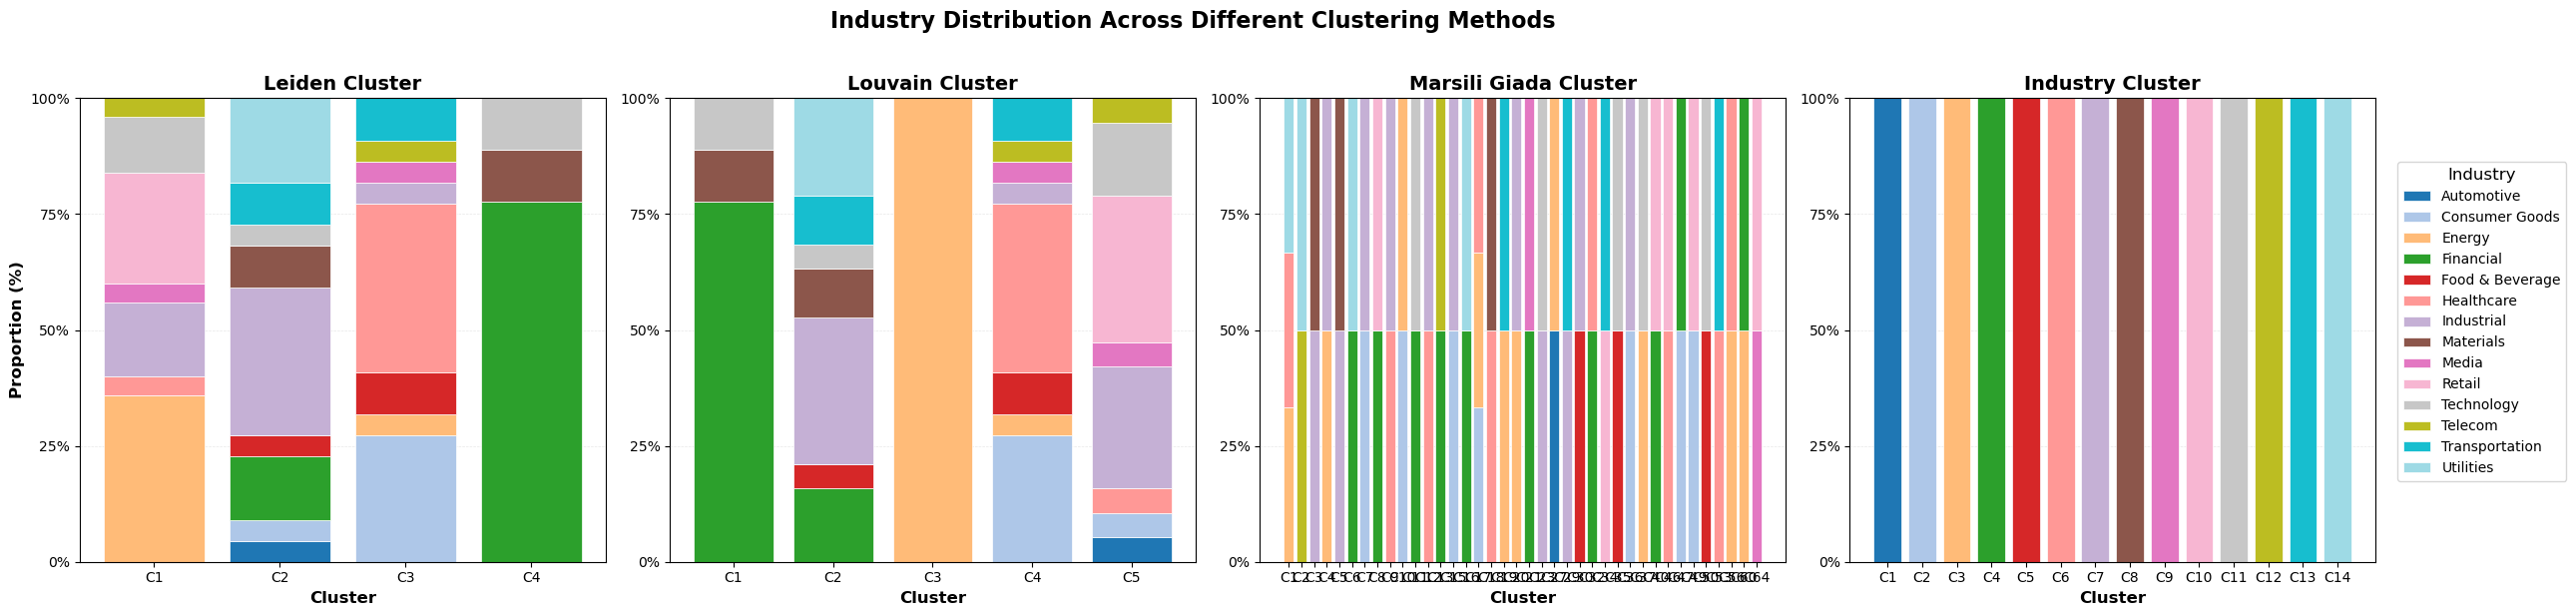


2. Creating cluster correlation graphs...


/Users/cyprien/Desktop/FBD2025/utils/clustering_utils/plots.py:348: RuntimeWarning: Mean of empty slice
  avg_within = np.nanmean(np.abs(within_corr))


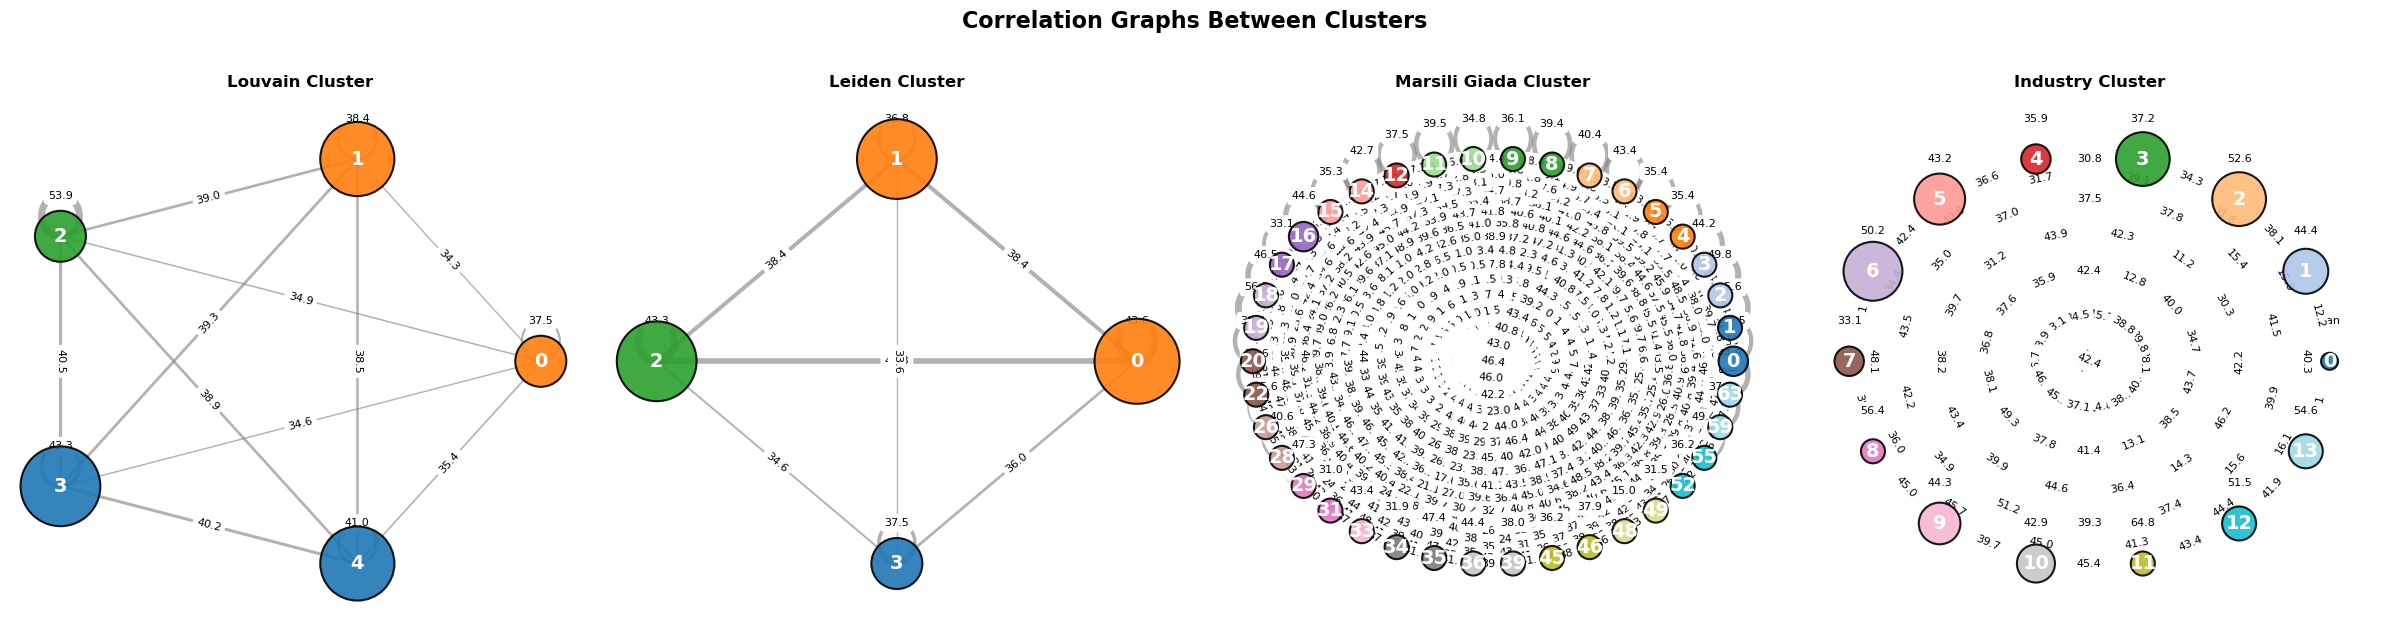


3. Creating individual plots...

   - Leiden_Cluster industry distribution...


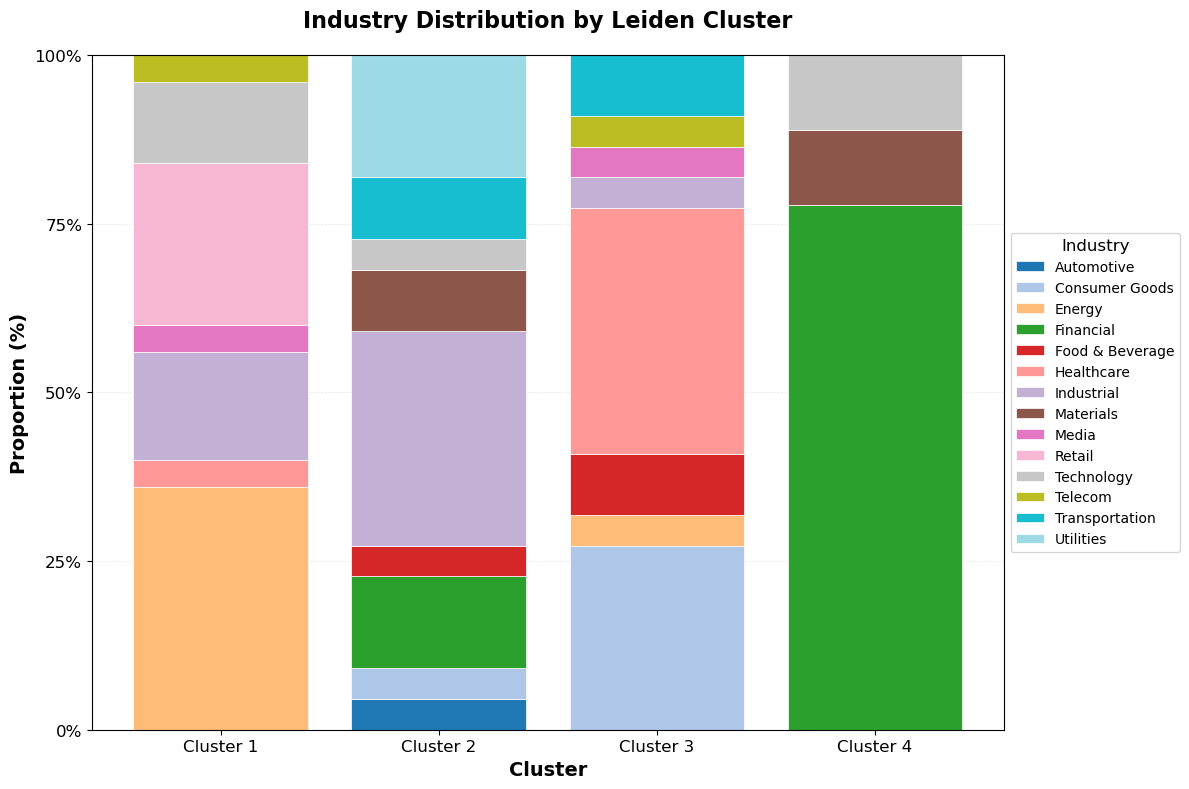


   - Louvain_Cluster industry distribution...


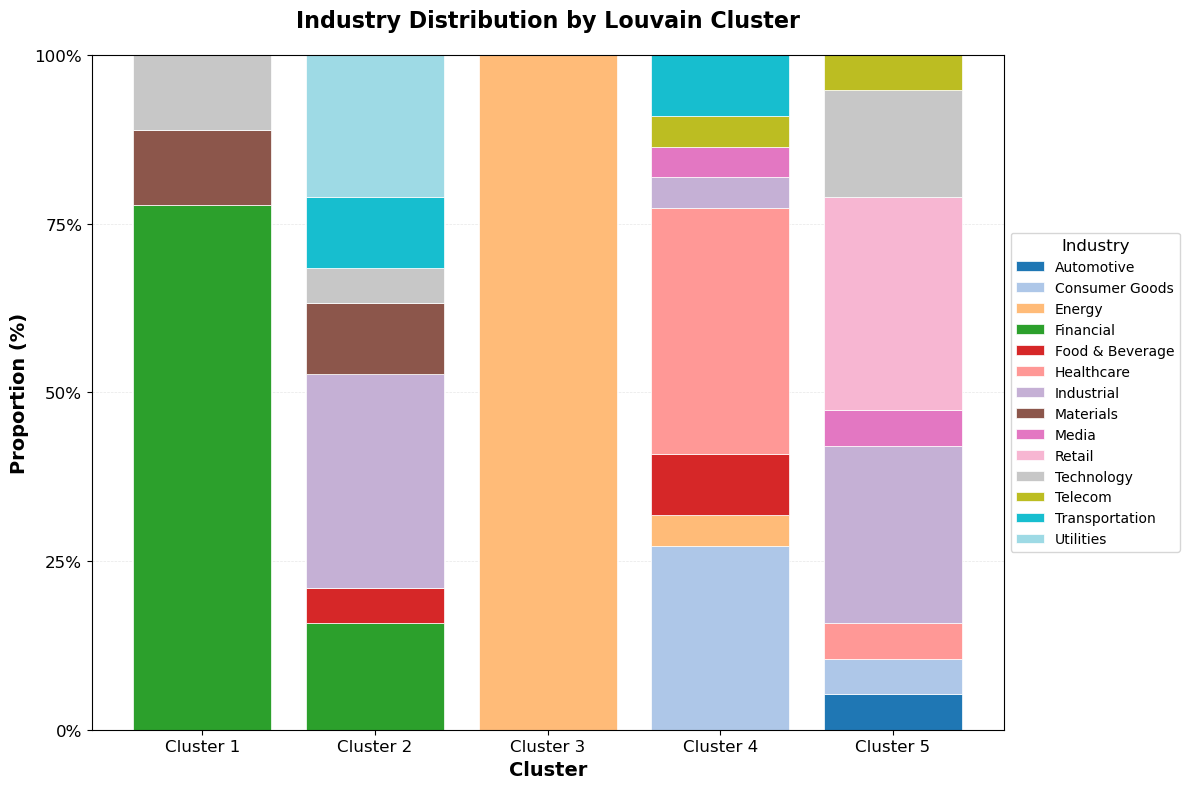


   - Marsili_Giada_Cluster industry distribution...


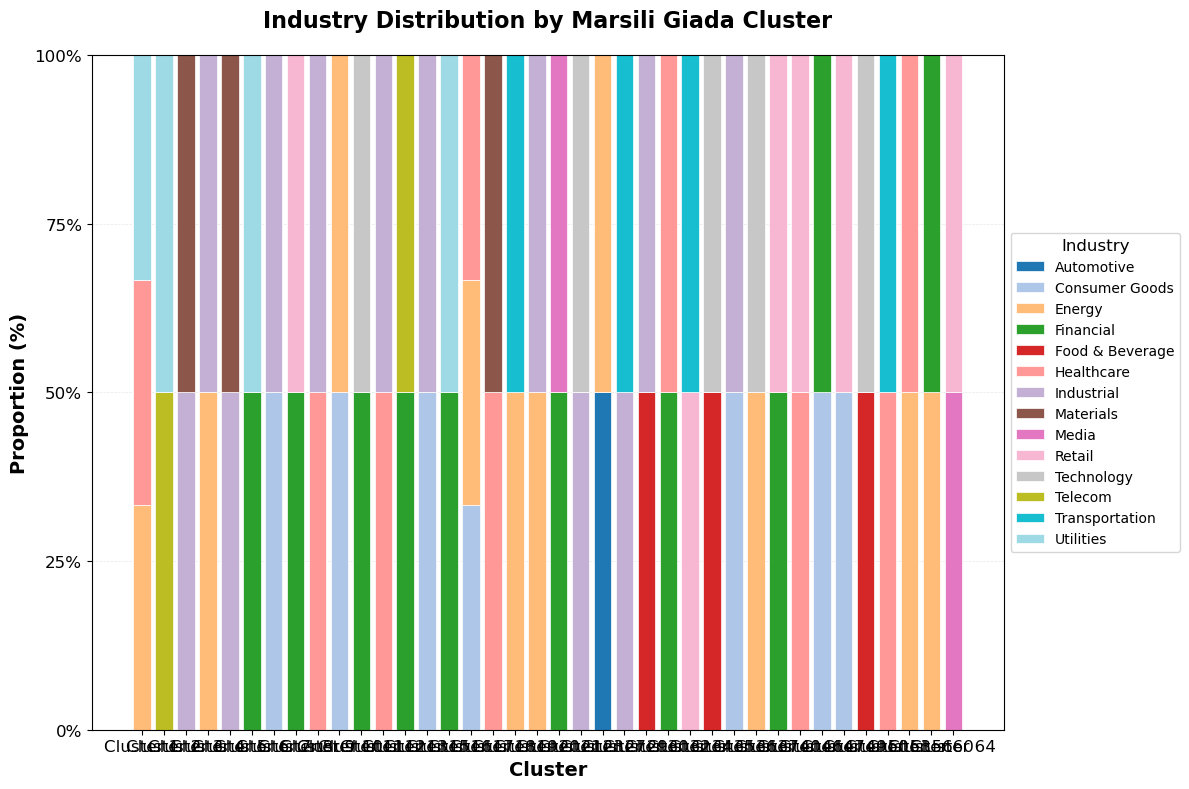


   - Industry_Cluster industry distribution...


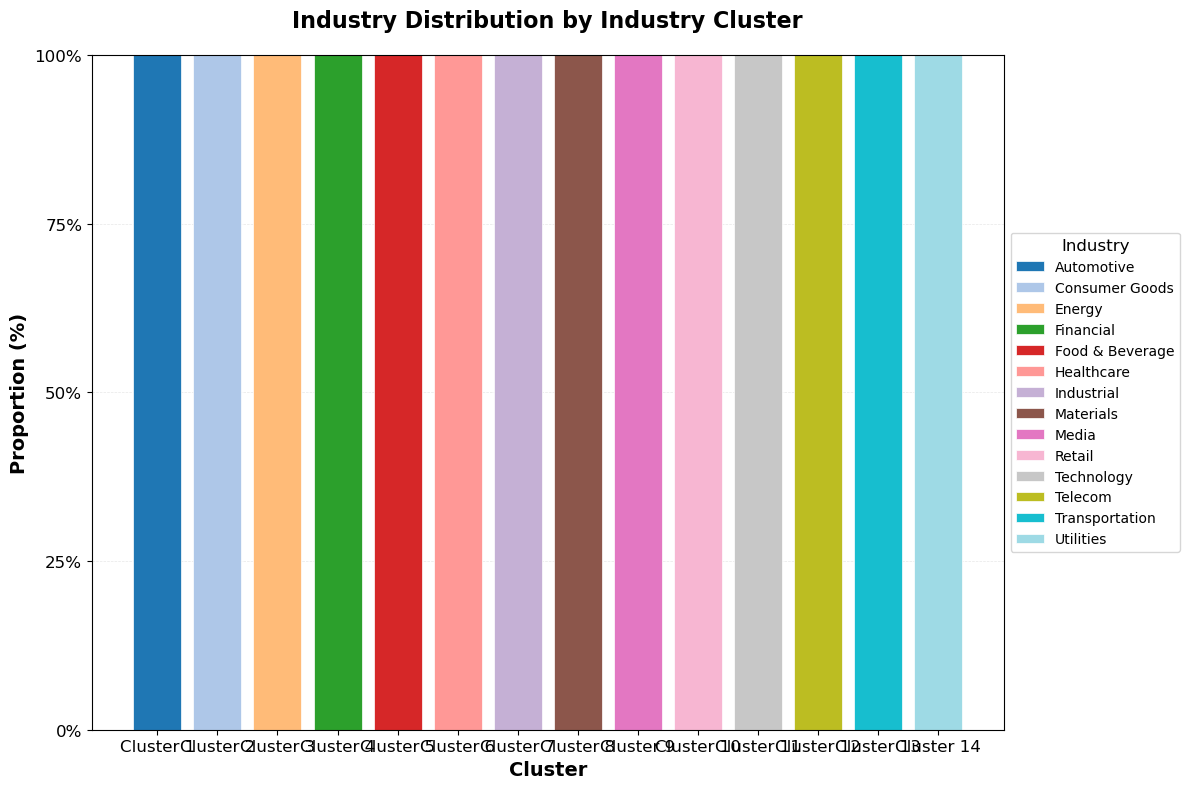


   - Leiden_Cluster correlation graph...


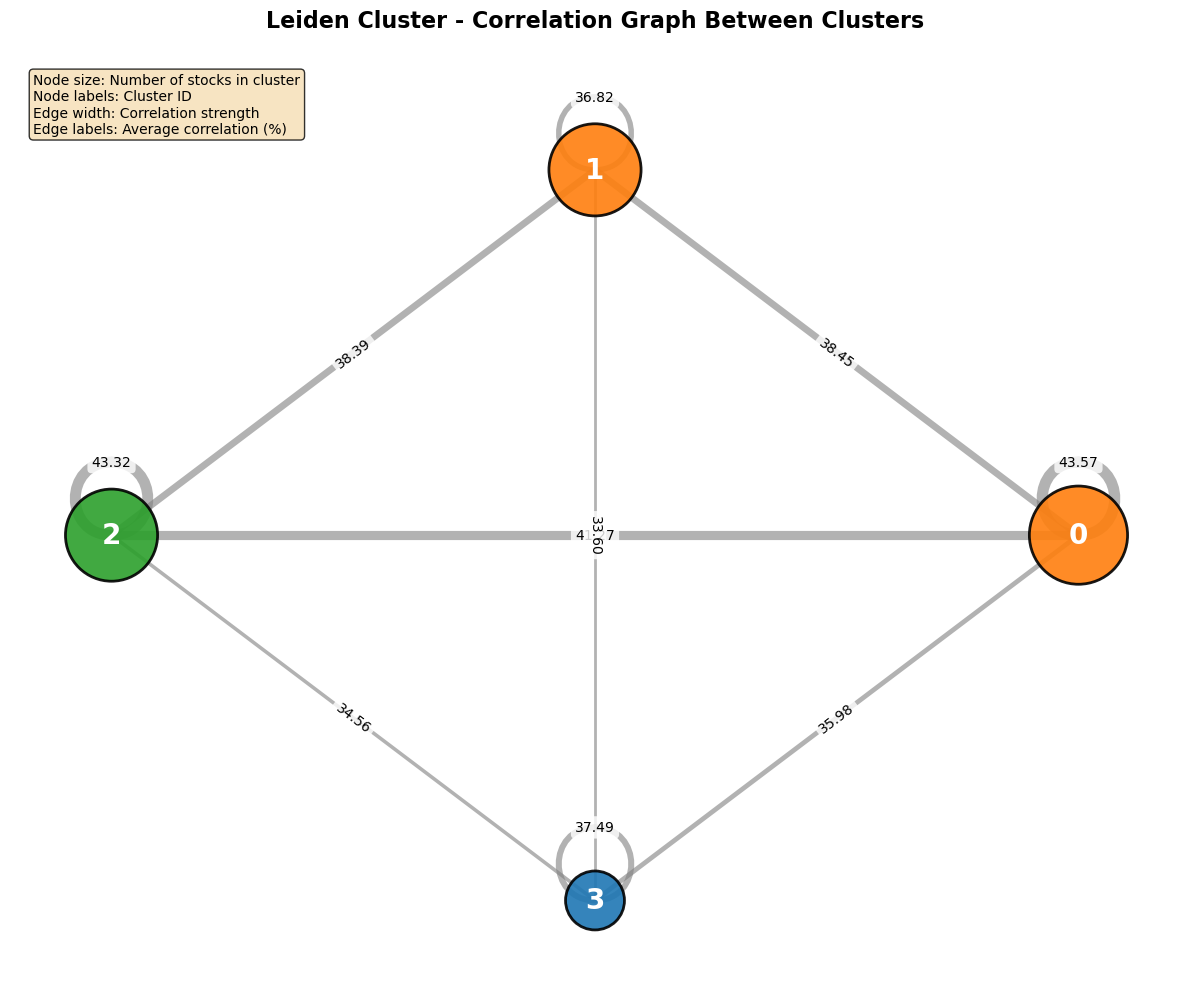


   - Louvain_Cluster correlation graph...


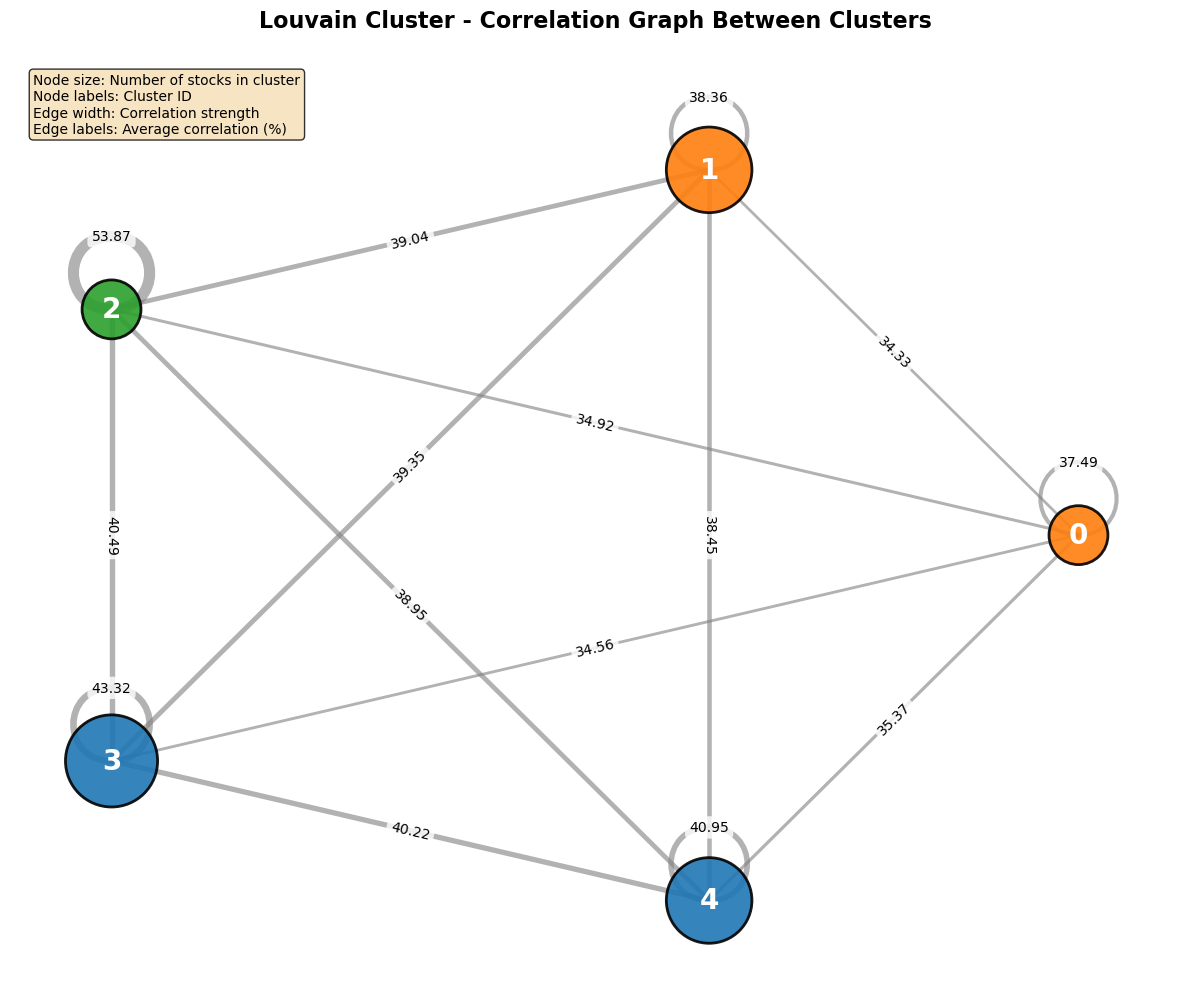


   - Marsili_Giada_Cluster correlation graph...


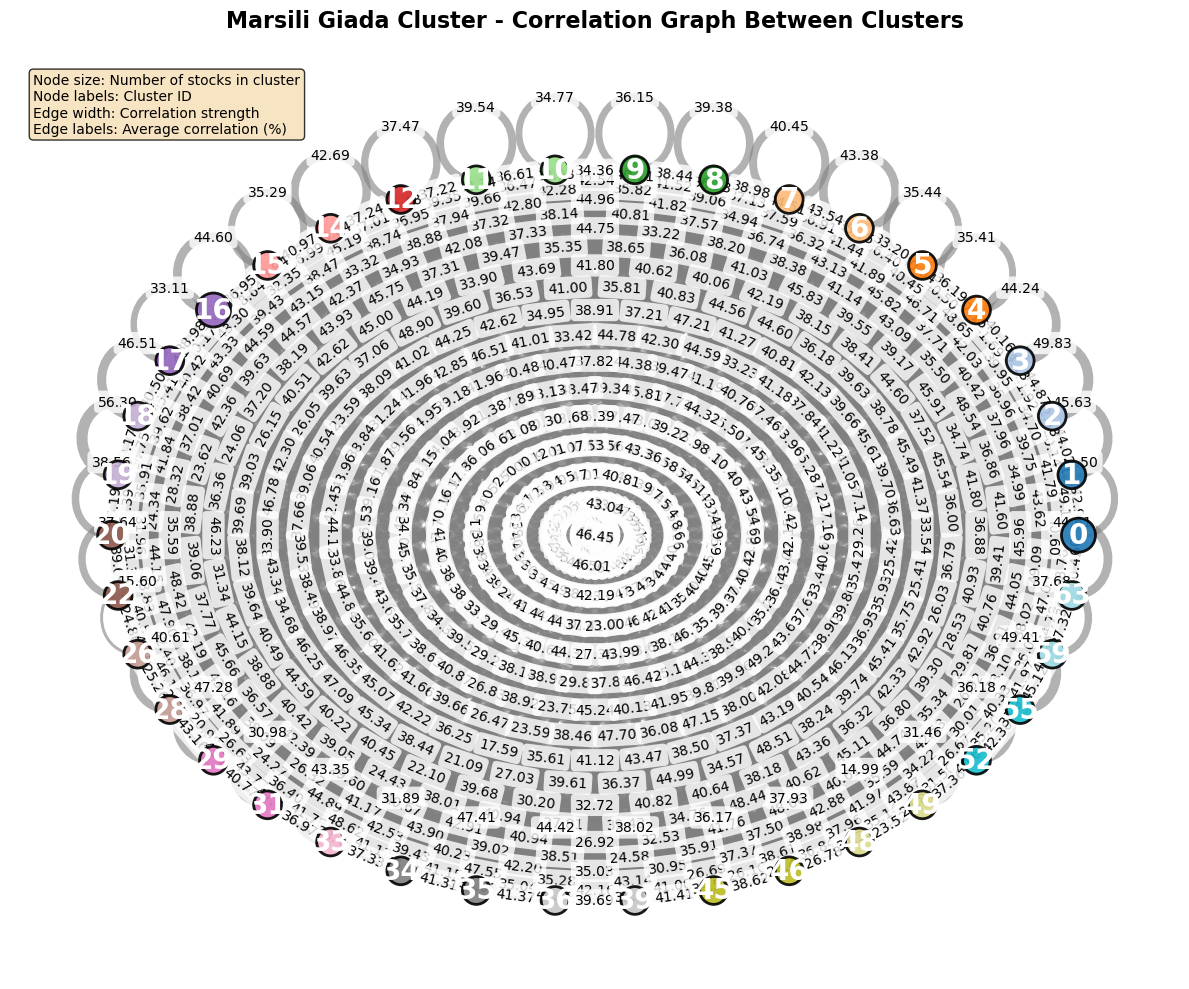


   - Industry_Cluster correlation graph...


/Users/cyprien/Desktop/FBD2025/utils/clustering_utils/plots.py:213: RuntimeWarning: Mean of empty slice
  avg_within = np.nanmean(np.abs(within_corr))


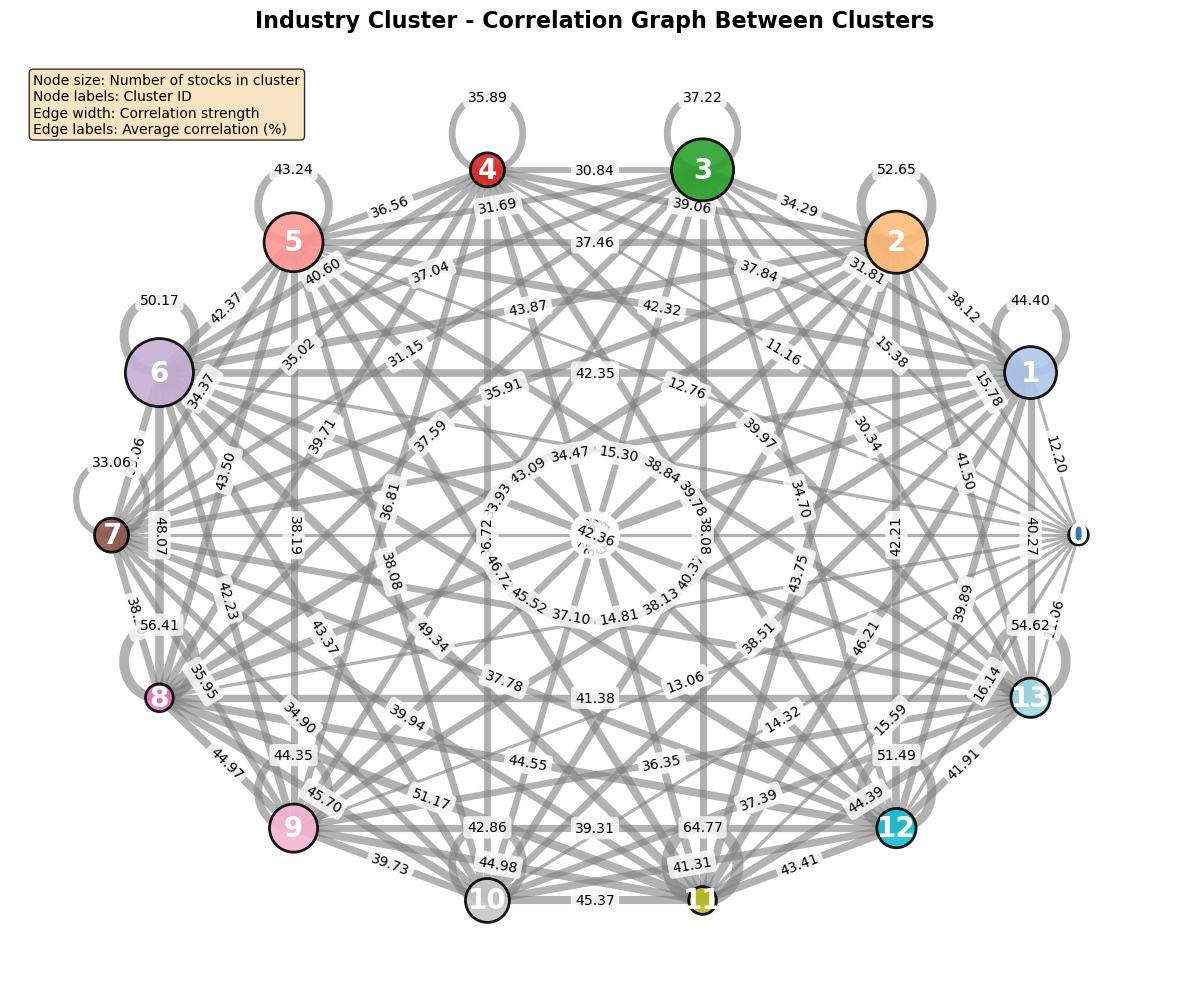


All visualizations complete!

PHASE 3 CORRECTLY TERMINATED



,Leiden_Cluster,Louvain_Cluster,Marsili_Giada_Cluster,Industry_Cluster
ABT,2,3,0,5
AEP,1,1,1,13
ALL,3,0,2,7
APA,0,2,3,2
AVP,1,1,4,7
...,...,...,...,...
WMB,0,2,0,2
WMT,0,4,7,9
WY,1,1,17,7
XOM,0,2,55,2


In [ ]:
from main_clustering import main_3

main_3(create_plots=True, show_individual_plots=True)